**Inteligência Artificial e Computacional**

Prof. Miguel Bozer da Silva - profmiguel.silva@fiap.com.br


---




In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Regressão Linear (Conceitos)


A Regressão Linear será o modelo que iremos utilizar para fazer a previsão do valor do seguro de vida dos dados que recebemos anteriormente. Entretanto, antes disso, vamos ver o que seria esse modelo.

De maneira geral a regressão linear é utilizada para fazer uma predição de uma saída a partir de uma soma dos produtos da entrada de dados por um conjunto de pesos mais uma termo que chamamos de *bias*. A equação a seguir ilustra a regressão linear:

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$

Onde:

*   $\hat{y}$ é a predição feita pelo modelo;
*   $n$ é o número de features;
*   $x_{i}$ é a i-ésima valor da feature de entrada
*   $\theta_{j}$ é o j-ésimo parâmetro a ser aprendido do modelo



Para o caso de termos apenas um valor de feature a imagem a seguir ilustra o modelo de regressão linear:


Vamos criar os nossos dados para fazermos um exemplo de regressão:
<center>
<img src="https://miro.medium.com/max/628/1*GnoMPH4FsH6CTzqCmAj6bA.png" width="500">

Vamos iniciar criando mais uma vez o conjunto de dados com a função $f(x)= 3x_{1} +4 + \varepsilon_{i}$, onde $\varepsilon_{i}$ sendo um erro aleatório:

In [ ]:
import numpy as np

# Criando os valores de x
X_ex = 2 * np.random.rand(100, 1) # array com shape (100,1) 
# Criando os valores de y, a partir de y = 4+ 3x + erro aleatório gaussiano
y_ex = 4 + 3 * X_ex + np.random.randn(100, 1)
X_ex

array([[1.14327533],
       [1.44703855],
       [1.29522963],
       [1.4630404 ],
       [1.1047863 ],
       [1.61832845],
       [1.05796965],
       [1.48683325],
       [1.33833894],
       [1.42229268],
       [1.77152705],
       [0.0727501 ],
       [0.71895226],
       [0.55706083],
       [0.68150761],
       [1.16742396],
       [0.56113401],
       [0.81542398],
       [0.1992326 ],
       [1.73308118],
       [1.51591463],
       [0.55907265],
       [1.87345116],
       [0.28673638],
       [1.58137455],
       [1.22155634],
       [1.28531843],
       [0.6487822 ],
       [1.05734109],
       [0.06182303],
       [1.68278021],
       [0.67909112],
       [1.70463935],
       [1.34151185],
       [1.64694409],
       [1.1715393 ],
       [1.73604745],
       [0.69825981],
       [1.22042498],
       [1.71399604],
       [1.07070845],
       [1.97623066],
       [0.80860175],
       [0.06412919],
       [1.16086549],
       [1.43889736],
       [1.86637443],
       [0.221

Vamos plotar os nossos dados:

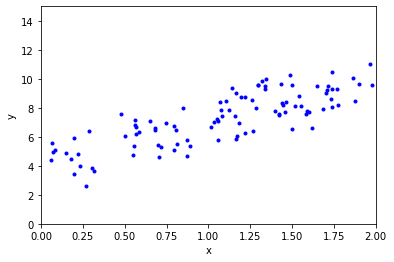

In [ ]:
import matplotlib.pyplot as plt

#Plotando o grafico:
plt.plot(X_ex, y_ex, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


**Aparentemente uma reta poderia nos ajudar a representar nossos dados**. Desse modo, podemos usar o modelo de regressão linear.




In [ ]:
from sklearn.linear_model import LinearRegression

#usando o metodo .fit podemos obter os coeficientes sem nenhum tratamento dos dados
modelo = LinearRegression().fit(X_ex, y_ex)
modelo.intercept_,modelo.coef_

(array([4.25517118]), array([[2.81076096]]))

Podemos fazer algumas previsões sobre os nossos dados:

In [ ]:
# Predição do modelo
y_pred = modelo.predict(X_ex)

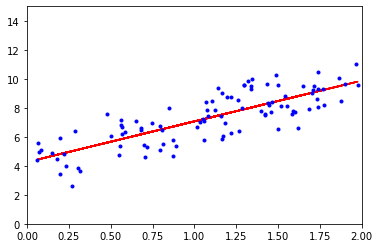

In [ ]:
#Criando o gráfico com os resultados finais:

plt.plot(X_ex, y_pred, "r-")
plt.plot(X_ex, y_ex, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Análise e divisão dos dados

## Recebendo os dados

Para receber os dados podemos fazer o upload do mesmo no Google Drive:

In [ ]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '17rC5lOWj89_K5_ALNgMzaA_wfck3Up6X'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

0.0 B Done.


Temos 6 colunas distintas nesse dataset:

*   sex: sexo da pessoa *(0: masculino; 1: feminino);*
*   bmi: Indice de massa corporal *(valor contínuo)*
*   children: Número de filhos *(valor discreto)*
*   smoker: Fumante *(0: não fuma; 1: fumante)*
*   region: Diferentes regiões onde a pessoa mora (categorizado em 0; 1; 2; 3)
*   charges: Valor do seguro de vida *(valor contínuo)*

## Analisando os nossos dados

Vamos analisar algumas funções do pandas para analisar os nossos dados e permitir que possamos conhece-los.

Podemos checar os tipos de dados envolvidos no nosso problema com a função info():


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


Desse conjunto de dados podemos ver que o mesmo possui váriaveis do tipo int e float.


In [ ]:
dados.shape

(348, 7)

O valor acima nos informa o tamanho dos nossos dados. Ele possui 348 linhas por 6 colunas. Assim temos 348 exemplos de dados relacionados aos atributos sex, bmi, children, smoker, region e charges.

Na sequência podemos ver alguns valores com .head() e .tail():

Com o .head() podemos visualizar os primeiros 5 valores do nosso conjunto de dados:

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Com o .tail() podemos visualizar os últimos 5 exemplos:

In [ ]:
dados.tail()

,age,sex,bmi,children,smoker,region,charges
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950
347,46,1,33.345,1,0,0,8334.45755


As vezes os conjuntos de dados podem conter alguns exemplos com valores nulos. Para isso, podemos checar se o nosso conjunto de dados possui algum valor nulo:

In [ ]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Podemos ver acima que nenhum dos valores obtidos eram nulos!

Caso houvesse alguns exemplos com valores nulos poderiamos excluir esses exemplos com o seguinte código:

In [ ]:
dados = dados.dropna()

Outra possibilidade seria preencher os valores nulos com a média dos dados de uma das colunas, por exemplo a média das idades para os valores nulos de idades. Entretanto vamos ver isso em outra aula.

## Analise Estatística dos Dados

Podemos usar a função describe para ter uma ideia de cada um dos valores dos atributos utilizados no nosso conjunto de dados.

In [ ]:
dados.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


Podemos ver acima dados como a média (mean), desvio padrão (std), valor mínimo (min), valor máximo (max) e os percentuais de 25, 50 e 75% dos dados.

O percentual nos indica a quantidade de exemplos que estão até um dado valor. Por exemplo 25% das pessoas estão com o bmi em 26,78 ou menos.

Dessa forma, podemos ter uma ideia da distribuição de cada um dos atributos.

Podemos também checar as proporções dos dados categoricos:

In [ ]:
dados['sex'].value_counts()

1    177
0    171
Name: sex, dtype: int64

In [ ]:
dados['smoker'].value_counts()

0    267
1     81
Name: smoker, dtype: int64

In [ ]:
dados['region'].value_counts()

2    95
0    86
1    85
3    82
Name: region, dtype: int64

Gráficos também podem nos ajudar a obter informações sobre a distribuição dos nossos dados:

O primeiro que vamos analisar são os histogramas, que mostram a distribuição de cada atributo dos nossos dados:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db7017190>,
      dtype=object)

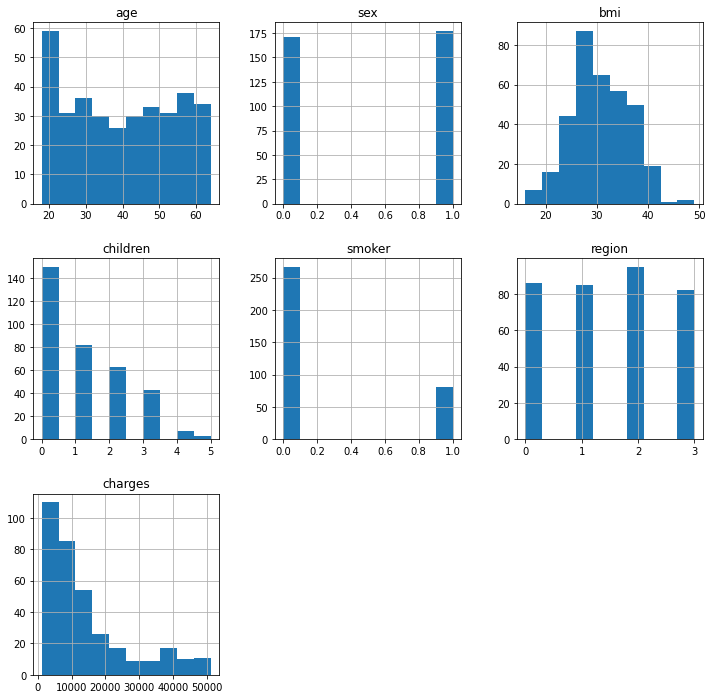

In [ ]:
dados.hist(figsize=(12,12))

## Aprendizado Supervisionado

No aprendizado supervisionado temos os dados de entrada do nosso modelo $\mathbf{x}_{i}$ e também conhecemos os labels deles $\mathbf{y}_{i}$, isto é o valor esperado da saída do modelo para cada entrada

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Nos dados acima o índice $i$ é utilizado para diferenciar cada uma das diferentes pessoas das quais foram levantados os dados acima. **Quais deles poderiam ser nossas entradas e nossas saídas?**

**A resposta para isso depende para cada caso!** Para uma empresa que vende seguros, o ideal é ter um modelo que dado os seguintes atributos: **[sex, bmi, children, smoker, region]** eles possam calcular o valor que será cobrado do seguro para essa pessoa **[charges]**

A imagem a seguir ilustra esse exemplo de divisão de entradas e saídas. 


<center>
<img src="https://drive.google.com/uc?export=view&id=1Yvziu9GlD5W-j-Zr1EJ3LAgY_yxbViYU" width="500">

Assim podemos criar um modelo que será treinado para fazer predições do valor de saída ($\hat{\mathbf{y}}_{i}$). O esquema para esse tipo de aprendizado supervisionado pode ser vizualizado a seguir:

<center>
<img src="https://drive.google.com/uc?export=view&id=1hFdoJXTk2jTR3zupjjqlr0dOKuaeOZCE" width="500">


A ideia acima parece muito interessante para criação de diversos modelos e pode ser utilizada em diferentes aplicações. 

Entretanto, seria interessante ter uma ideia do quão bom é o nosso modelo, isto é, será que o modelo que criamos tem uma boa capacidade para estimar a sua saída ($\hat{\mathbf{y}}_{i}$) para novos dados?

O que estamos perguntando acima é a verificação da capacidade de generalização do nosso modelo, isto é, a capacidade do modelo de conseguir boas estimativas de saídas para novos dados.

## Divisão dos conjuntos de dados

Pensando na pergunta acima, existem duas possibilidades de soluções:



*   Poderíamos treinar um modelo com todos os nossos dados e vender o resultado disso para um empresa. A empresa posteriormente diria se o modelo está tendo um bom desempenho ou não. **Cenário ruim: Caso o modelo não esteja com um bom desempenho iriamos prejudicar o nome da empresa**
*   Poderíamos dividir os nossos dados em conjunto de treinamento e conjunto de teste. Dessa forma, treinariamos o modelo com o primeiro conjunto e poderíamos utilizar alguma métrica para avaliar o nosso modelo no segundo conjunto de dados. **Assim, teremos uma ideia do desempenho do nosso modelo antes de enviar ao cliente!**



Na imagem a seguir podemos ver o procedimento para trabalhar com o aprendizado supervisionado com a divisão dos dados em conjunto de treinamento ($\mathbf{X}_{train}$ e $\mathbf{y}_{train}$) e no conjunto de teste ($\mathbf{X}_{test}$ e $\mathbf{y}_{test}$)

<center>
<img src="https://drive.google.com/uc?export=view&id=1k3nIve0eo-zOjA48YouMHoKJOFfiabS6" width="600">




Dessa forma os nossos dados que possuem a dimensão de 348 exemplos com 6 colunas devem ser divididos em dois conjuntos para podermos trabalhar com o seu aprendizado supervisionado

In [ ]:
dados.shape

(348, 7)

Para fazer isso iremos usar uma função do scikit-learn, o train_test_split:

In [ ]:
# importando a biblioteca que iremos utilizar:
from sklearn.model_selection import train_test_split

# Dividindo X e y (Entrada e saída de dados)
X = dados.drop(columns=['charges']).values #Excluindo a coluna de charges do conjunto de dados
y = dados.charges.values # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state = 42 # Modelo de divisão número 42
                                                    )

#scale = MinMaxScaler().fit(X_train)

#X_train = scale.transform(X_train)
#X_test = scale.transform(X_test)




Em drop poderiamos ter removido outras colunas caso assim fosse necessário, por exemplo: 


X = dados.drop(columns=['sex','charges'])

Assim iriamos remover duas colunas do nosso conjunto de dados X: sex e charges


Vamos agora checar a dimensão de cada conjunto de dados:

In [ ]:
X_train.shape

(243, 6)

In [ ]:
y_train.shape

(243,)

In [ ]:
X_test.shape

(105, 6)

In [ ]:
y_test.shape

(105,)

No código acima pegamos os nossos dados e dividimos eles em conjunto de treinamento e teste, tendo os dados de entrada $\mathbf{X}$ e os dados de saída  $\mathbf{y}$

# Realizando o treinamento e checando as métricas

## Regressão Linear exemplo Valores do Seguro de Vida

Agora que entendemos o conceito da Regressão Linear vamos aplicar ela ao caso do seguro de vida. Vamos treinar o modelo utilizando o conjunto de dados de treinamento:

In [ ]:
# Treinando o modelo
model = LinearRegression().fit(X_train, y_train)

Agora vamos verificar os nossos valores obtidos de previsão desse modelo treinado:

In [ ]:
# Predição do modelo
y_pred = model.predict(X_test)
y_pred

array([12362.26308688, 13918.30516598, 27260.96080287,  8781.1273159 ,
        9129.5832481 , 13285.56525884, 29437.30793168, 28497.91025172,
       10561.41300792, 29044.97477605, 13308.1189003 , 12111.32083061,
        2114.76138366, 13137.623387  , -3412.70128492, 38727.41903557,
       23421.08785597,  4285.82929604, 14903.24205607,  7510.86734422,
       33898.44176419, 13372.81092948,  6368.53726686, 35431.16444674,
       29161.94577111, 13606.28393979,  4722.1084412 , 11233.53356522,
        4713.50415769, 11250.19226132, 37975.71890179, 19081.45797729,
        2956.36350958, 14639.89472011,  3440.0113639 , 39267.1786298 ,
        4820.77256009, 27273.09113579, 13649.170976  , 10504.02917824,
        8569.95231756, 32658.8625266 ,  3385.11530632,  3380.81495234,
         151.88303369,  5851.54961074, 26566.39407996, 17873.98816653,
       13183.56138341, 28489.39409151, 12825.63143978,  2725.02669849,
       11021.70713877, 10218.53143935,  9473.1946602 , 40746.70012507,
      

In [ ]:
y_test

array([13047.33235, 11488.31695, 34838.873  ,  7441.053  ,  6128.79745,
       10115.00885, 37133.8982 , 19515.5416 ,  9625.92   , 19964.7463 ,
       11356.6609 ,  6948.7008 ,  3561.8889 , 10825.2537 ,  1694.7964 ,
       48173.361  , 16297.846  ,  1532.4697 , 13607.36875,  6455.86265,
       24869.8368 , 20630.28351,  5152.134  , 42856.838  , 37165.1638 ,
       14001.1338 , 27375.90478, 28923.13692,  2166.732  , 12044.342  ,
       47055.5321 , 11381.3254 ,  1137.011  , 11987.1682 ,  1980.07   ,
       47496.49445,  6272.4772 , 35585.576  , 14001.2867 , 12142.5786 ,
        8601.3293 , 39836.519  ,  2867.1196 ,  3756.6216 ,  2150.469  ,
        6686.4313 , 34303.1672 , 14901.5167 , 11946.6259 , 35491.64   ,
       13937.6665 , 21984.47061, 11520.09985,  5138.2567 ,  4463.2051 ,
       48549.17835,  3393.35635, 14256.1928 , 11741.726  ,  2404.7338 ,
       36950.2567 , 13770.0979 ,  4133.64165, 29523.1656 ,  3947.4131 ,
        5729.0053 , 11735.87905,  7419.4779 ,  8516.829  ,  6600

In [ ]:
X_test.shape

(105, 6)

In [ ]:
y_pred.shape

(105,)

## Métricas de Desempenho
Várias são as métricas que podemos usar para avaliar um modelo de regressão. Aqui vamos conversar sobre as 3 mais comuns:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza mais erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa.

$MSE = \frac{1}{m}\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^{2}$

In [ ]:
mean_squared_error(y_test, y_pred)

41278381.814600945

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

$MAE = \frac{1}{m}\sum^{m}_{i=1}|\hat{y}^{(i)}-y^{(i)}|$

In [ ]:
mean_absolute_error(y_test, y_pred)

4474.42114669917

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

In [ ]:
r2_score(y_test, y_pred)

0.7715355380120451

$R^{2} = 1- \frac{1}{m}\frac{\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum^{m}_{i=1}(y^{(i)}-\bar{y}^{(i)})^{2}}$

## Outros modelos de regressão

### Árvores de Decisão para regressão:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)
y_pred_dtr = tree_reg.predict(X_test)
r2_score(y_test, y_pred_dtr)

0.866289643506343

### Random Forest para regressão:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_RFR = forest_reg.predict(X_test)
r2_score(y_test, y_pred_RFR)

0.8570326356342638

In [ ]:
mean_absolute_error(y_test, y_pred_RFR)

2911.2045833933344

In [ ]:
mean_squared_error(y_test, y_pred_RFR)

25830982.21038495

### Gradient Boosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(min_samples_leaf=5, n_estimators=50)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_test)
r2_score(y_test, y_pred_gbrt)

0.8779949012947424

In [ ]:
mean_absolute_error(y_test, y_pred_gbrt)

2649.236599865141

In [ ]:
mean_squared_error(y_test, y_pred_gbrt)

22043573.00851987

# Exercício

Vamos analisar um conjunto de dados de jogadores de Counter Striker e aplicar um modelo de regressão linear desses dados. O conjunto de dados é carregado a seguir:

In [1]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1tLbBqTphKeaYTSvj_vKQS759qtrw51Vk'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './cs_data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
cs_data = pd.read_csv("cs_data.csv", index_col=0 )

672.0 KiB Done.


Responder os itens solicitados na sequencia:

a) Fazer a análise dos dados

In [2]:
# seu código aqui
cs_data.head()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
Player Name,,,,,,,
DNB,45,38,4,20,8,42,90
link1n,31,22,3,17,5,54,51
sn0w,42,14,4,20,0,40,42
reedkihaddi,90,13,3,23,0,28,33
pEhnol,33,11,4,27,0,54,26


b) Fazer a análise estatística dos dados

In [ ]:
# seu código aqui

c) Fazer a divisão dos dados em conjunto de treinamento e teste, sendo o Score o valor que desejamos como saída do modelo

Obs.: Para o conjunto de dados de entrada, excluir TAMBÉM a coluna Player id. (Essa coluna é apenas o nome dos jogadores e não possui nenhuma informação)

In [ ]:
# seu código aqui

d) Para os dados que foram divididos anteriormente, realizar o seu treinamento com um modelo de Regressão Linear

In [ ]:
# seu código aqui

e) Fazer a previsão para o conjunto dos dados de teste

In [ ]:
# seu código aqui

f) Calcular as métricas de desempenho

In [ ]:
# seu código aqui

# Correção Exercício

Vamos analisar um conjunto de dados de jogadores de Counter Striker e aplicar um modelo de regressão linear desses dados. O conjunto de dados é carregado a seguir:

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1tLbBqTphKeaYTSvj_vKQS759qtrw51Vk'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './cs_data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
cs_data = pd.read_csv("cs_data.csv")

Responder os itens solicitados na sequencia:

a) Fazer a análise dos dados

In [ ]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22924 entries, 0 to 22923
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  22924 non-null  object
 1   Ping         22924 non-null  int64 
 2   Kills        22924 non-null  int64 
 3   Assists      22924 non-null  int64 
 4   Deaths       22924 non-null  int64 
 5   MVP          22924 non-null  int64 
 6   HSP          22924 non-null  int64 
 7   Score        22924 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.4+ MB


In [ ]:
cs_data.shape

(22924, 8)

In [ ]:
cs_data.head()

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score
0,DNB,45,38,4,20,8,42,90
1,link1n,31,22,3,17,5,54,51
2,sn0w,42,14,4,20,0,40,42
3,reedkihaddi,90,13,3,23,0,28,33
4,pEhnol,33,11,4,27,0,54,26


In [ ]:
cs_data.isnull().sum()

Player Name    0
Ping           0
Kills          0
Assists        0
Deaths         0
MVP            0
HSP            0
Score          0
dtype: int64

b) Fazer a análise estatística dos dados

In [ ]:
cs_data.describe()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
count,22924.000000,22924.000000,22924.000000,22924.000000,22924.000000,22924.000000,22924.000000
mean,49.340080,17.856002,3.738920,18.029663,2.342916,33.949834,44.720119
std,41.060362,7.222182,2.187483,4.498182,2.066631,15.233798,16.738878
min,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,13.000000,2.000000,16.000000,0.000000,23.000000,34.000000
50%,44.000000,18.000000,4.000000,19.000000,2.000000,33.000000,45.000000
75%,64.000000,23.000000,5.000000,21.000000,4.000000,44.000000,56.000000
max,996.000000,64.000000,18.000000,29.000000,16.000000,100.000000,145.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f355575f8d0>,
      dtype=object)

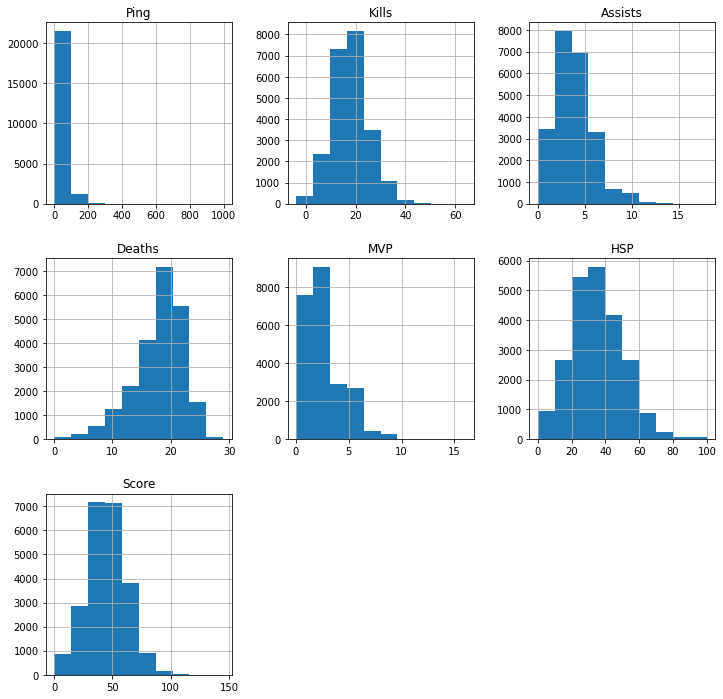

In [ ]:
cs_data.hist(figsize=(12,12))

c) Fazer a divisão dos dados em conjunto de treinamento e teste, sendo o Score o valor que desejamos como saída do modelo

Obs.: Para o conjunto de dados de entrada, excluir TAMBÉM a coluna Player id. (Essa coluna é apenas o nome dos jogadores e não possui nenhuma informação)

In [ ]:
# Dividindo X e y (Entrada e saída de dados)
X = cs_data.drop(columns=['Player Name','Score']).values #Excluindo a coluna de charges do conjunto de dados
y = cs_data.Score.values # Em y colocamos apenas os valores que desejamos para a saída dos dados.

scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state = 42 # Modelo de divisão número 42
                                                    ) 

d) Para os dados que foram divididos anteriormente, realizar o seu treinamento com um modelo de Regressão Linear

In [ ]:
# Treinando o modelo
model = LinearRegression().fit(X_train, y_train)

e) Fazer a previsão para o conjunto dos dados de teste

In [ ]:
# Predição do modelo
y_pred = model.predict(X_test)
y_pred

array([ 27.56727548,  52.27950854, 100.56017832, ...,  32.73462471,
        47.2256239 ,  71.4286788 ])

In [ ]:
y_test

array([29, 50, 96, ..., 28, 49, 72])

In [ ]:
y_test.shape

(6878,)

f) Calcular as métricas de desempenho

In [ ]:
mean_squared_error(y_test, y_pred)

14.77458518931525

In [ ]:
mean_absolute_error(y_test, y_pred)

3.006486086426825

In [ ]:
r2_score(y_test,y_pred)

0.9479663227253443

# Referencia Bibliográfica:



GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopol: O’reilly Media, 2017